# 1. 문제정의 


  ## 1.1 경진대회 소개

- 데이콘 신용카드 사용자 연체 예측 AI 경진 대회

- https://dacon.io/competitions/official/235713/overview/description

    ### 1.1.1 평가
  - 평가산식 : Logloss
  - Public 평가 : 테스트 데이터 중 랜덤 샘플 된 50%로 채점
  - Private 평가 : 나머지 50 % 테스트 데이터로 채점

    ### 1.1.2 배경
    - 신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정합니다. 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대급 연체 가능성을 예측합니다. 

    - 현재 많은 금융업계는 인공지능(AI)를 활용한 금융 서비스를 구현하고자 합니다. 사용자의 대금 연체 정도를 예측할 수 있는 인공지능 알고리즘을 개발해 금융업계에 제안할 수 있는 인사이트를 발굴해주세요!

    ### 1.1.3 데이터 분석 대상
    - train : 총 26,457행의 데이터 20열
    - test : 총 10,000행의 데이터 19열("credit" 제외)

    => train 데이터를 이용해 모델을 학습 시킨 뒤 test 데이터를 활용해 **"credit"** 예측

## 1.2 데이터 도메인 정보
-	index
-	gender: 성별
-	car: 차량 소유 여부
-	reality: 부동산 소유 여부
-	child_num: 자녀 수
-	income_total: 연간 소득
-	income_type: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
-	edu_type: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
-	family_type: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
-	house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
-	DAYS_BIRTH: 출생일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
-	DAYS_EMPLOYED: 업무 시작일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 양수 값은 고용되지 않은 상태를 의미함
-	FLAG_MOBIL: 핸드폰 소유 여부
-	work_phone: 업무용 전화 소유 여부
-	phone: 가정용 전화 소유 여부
-	email: 이메일 소유 여부
-	occyp_type: 직업 유형 
-	family_size: 가족 규모
-	begin_month: 신용카드 발급 월 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
-	credit: 사용자의 신용카드 대금 연체를 기준의 신용도 => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

## 1.3 평가척도
=> 참가자가 최종적으로 제출한 결과물의 우열을 판단하는 척도

- 본 대회에서는 logloss라는 평가척도를 적용합니다. 이 logloss 값은 분류모델에서 평가지표로 사용하는 지표 중 하나이며, 0에 가까울수록 정확하다는 뜻이고, 확률이 낮아질수록 logloss값은 급격하게 커진다.

## 1.4 문제 해결을 위한 접근 방식

- 이번에는 기존 방식과는 다르게
- **데이터 모델링 -> 결과 확인 -> EDA -> 전처리 -> 모델링 성능 개선**

## 1.5 섹션 아이디어
- [11.30]
  - 1) 이번에는 지난 번과 다르게 먼저 기초적인 모델링을 통해 예측 후 성능 개선을 위해 추가적인 부분을 수정 

# 2. 데이터 간단히 탐색

## 2.1 데이터 연결
- 데이터 로드를 위한 url 연결

In [ ]:
import requests
from io import StringIO

In [ ]:
# 학습 데이터 로드
orig_url = 'https://drive.google.com/file/d/1Rku0YUinqkflwUAgaT66uD4W1nhVEll5/view?usp=sharing'
file_id = orig_url.split('/')[-2]
down_url = 'https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(down_url).text
train_url = StringIO(url)

In [ ]:
# 테스트 데이터 로드
orig_url = 'https://drive.google.com/file/d/1UpAcGoRB5zOqzNFw9EYMUwjLcWgzahYM/view?usp=sharing'
file_id = orig_url.split('/')[-2]
down_url = 'https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(down_url).text
test_url = StringIO(url)

In [ ]:
# 제출 데이터 로드
orig_url = 'https://drive.google.com/file/d/157dN3myXQ-sIXNKiWRAVTs4fvU5ZChEJ/view?usp=sharing'
file_id = orig_url.split('/')[-2]
down_url = 'https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(down_url).text
sub_url = StringIO(url)

## 2.2 데이터 로드


### 2.2.1 학습 데이터

In [ ]:
import pandas as pd

In [ ]:
# 학습 데이터 로드
X = pd.read_csv(train_url)

In [ ]:
# 학습 데이터 기본 정보 파악
display(X.info())

display(X.head().T)

display(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

None

,0,1,2,3,4
index,0,1,2,3,4
gender,F,F,M,F,F
car,N,N,Y,N,Y
reality,N,Y,Y,Y,Y
child_num,0,1,0,0,0
income_total,202500,247500,450000,202500,157500
income_type,Commercial associate,Commercial associate,Working,Commercial associate,State servant
edu_type,Higher education,Secondary / secondary special,Higher education,Secondary / secondary special,Higher education
family_type,Married,Civil marriage,Married,Married,Married
house_type,Municipal apartment,House / apartment,House / apartment,House / apartment,House / apartment


,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


- 자녀수가 19???? 19명의 자녀?? -> family_size 도 20명인 애들이 있다.
- 음수로 나타나 있는 열 3개 양수로 전환해도 큰 문제는 없을거 같다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a69127b50>,
      dtype=object)

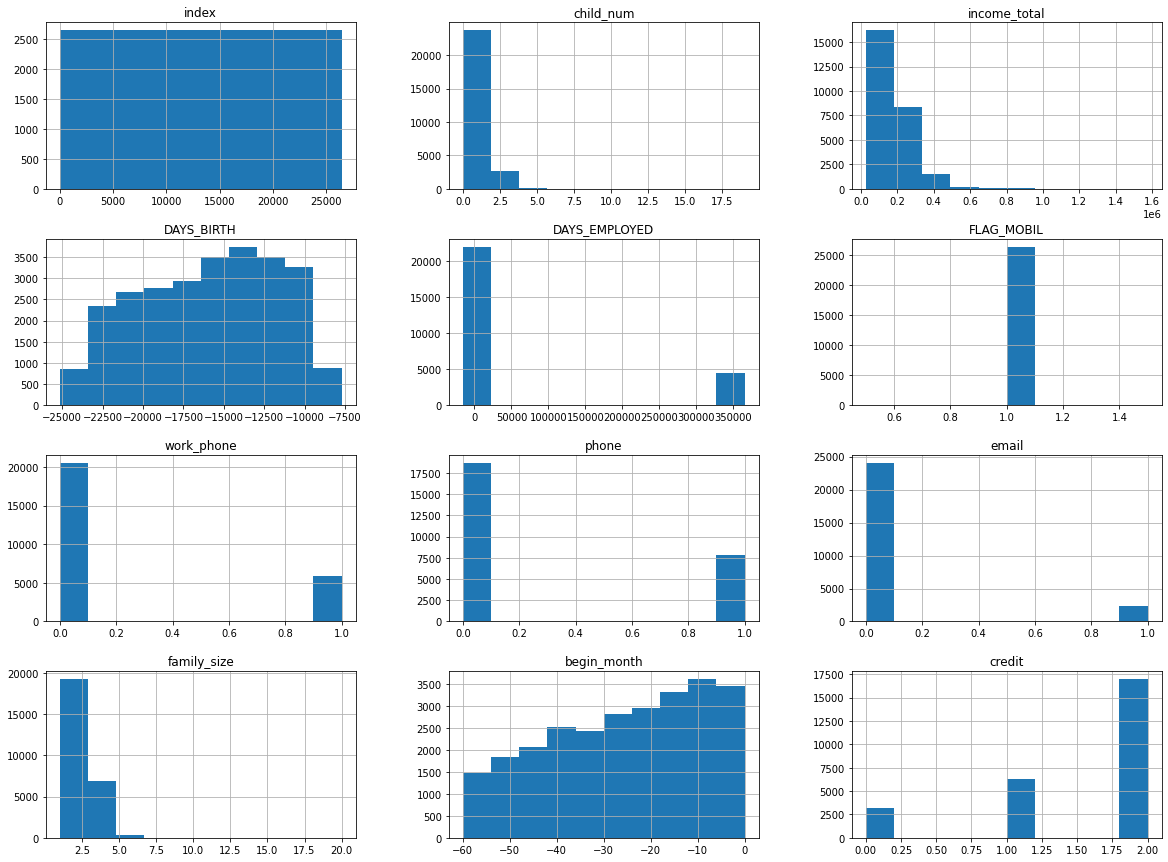

In [ ]:
# 이상치 좀 더 확인
X.hist(figsize = (20,15))

- credit -> 타겟 데이터 너무 불균형적이다.

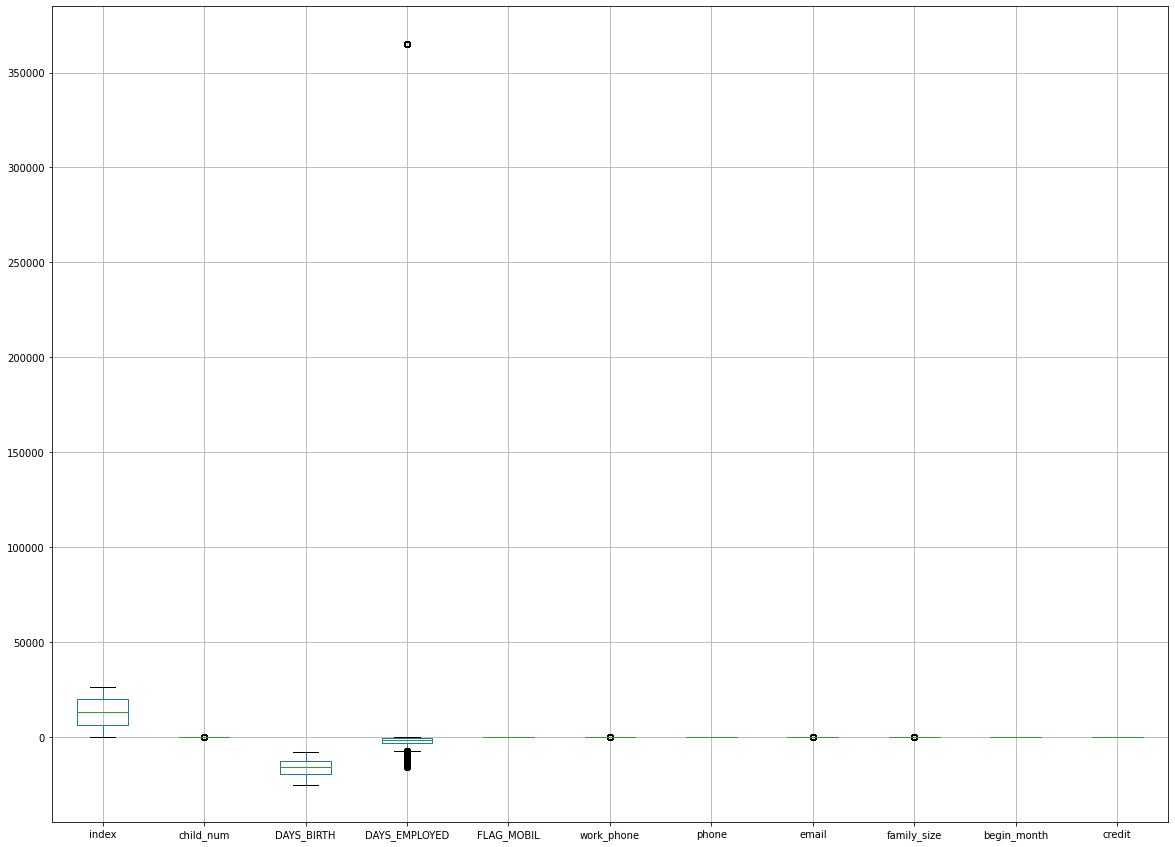

In [ ]:
# 이상치 확인
X.drop("income_total",axis= 1).boxplot(figsize = (20,15)) # days_employed 이상치 발견

In [ ]:
# days_employed 이상치 확인
display(X[X["DAYS_EMPLOYED"] >= X["DAYS_EMPLOYED"].quantile(0.80)]) # 이러한 양수의 값들은 고용되지 않은 자들을 의미 1로 변환해줘도 괜찮을라나?

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
11,11,M,Y,Y,1,135000.0,Commercial associate,Higher education,Married,House / apartment,-11759,-91,1,0,0,0,Managers,3.0,-51.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26436,26436,F,N,Y,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-10924,-97,1,0,0,0,Cleaning staff,1.0,-22.0,2.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0


- days_employed 이상치 확인 -> 모두 365243 -> 고용되지 않은 자들 의미 이들을 모두  1로 대치해줄까?
- 고용되지않은 자들 즉 결측값의 수와 위 이상치들의 수가 같을까?

In [ ]:
#결측값 추출
display(pd.DataFrame(X.isnull().sum()).T)

#이상치 추출
display(sum(X["DAYS_EMPLOYED"] == X["DAYS_EMPLOYED"].max()))

#이상치 확인
display(sum(X["DAYS_EMPLOYED"] == 0)) # 양수들 0으로 대치해줘도 될듯?

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8171,0,0,0


4438

0

- 다르다. -> 양수는 모두 365243

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2671,2671,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-11.0,2.0
4094,4094,F,N,Y,5,189000.0,Working,Secondary / secondary special,Separated,House / apartment,-15450,-428,1,0,1,0,NaN,6.0,-50.0,2.0
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-7.0,2.0
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,-58.0,2.0
9615,9615,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-19.0,1.0
10321,10321,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-46.0,0.0
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
12876,12876,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-15.0,1.0
17560,17560,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-20.0,1.0
17978,17978,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-21.0,1.0


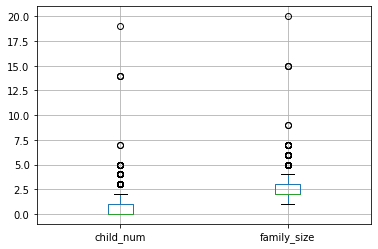

In [ ]:
#자녀수와 가족수 이상치 확인
temp = X[["child_num","family_size"]]
temp.boxplot()

display(X[X["child_num"] >= 5])

- 자녀수가 19인 고객의 가족 구성원이 20인것으로 보아 데이터에 오류는 없을 것 같다. test데이터를 확인후 제거를 고려

-중복데이터가 눈에 보인다...

In [ ]:
# 중복데이터 확인
temp = X.drop("index",axis = 1)
print(temp.duplicated().sum()) # 1634개의 열 중복

display(temp[temp.duplicated()])

1634


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,1,0,0,0,NaN,2.0,-35.0,2.0
1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,-29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0
26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


- 중복열을 제거해줘야할까,,,?? 1634개의 열 전체 데이터의 8퍼정도?

### 2.2.2 테스트 데이터

In [ ]:
# 테스트 데이터 로드
test = pd.read_csv(test_url)

In [ ]:
# 테스트 데이터 기본 정보 파악
display(test.info())

display(test.head())

display(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

None

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


- 자녀수 이상치가 그렇게 크지 않다.... 학습 데이터의 이상치 제거는 해주면 좋을 듯

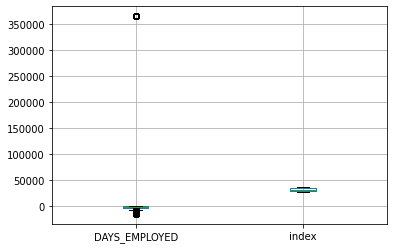

In [ ]:
test[["DAYS_EMPLOYED","index"]].boxplot()

In [ ]:
# 중복 데이터.
display(test.drop("index",axis = 1).duplicated().sum()) # 352개 존재

352

### 2.2.3 제출 데이터

In [ ]:
# 테스트 데이터 로드
sub = pd.read_csv(sub_url)

In [ ]:
# 테스트 데이터 기본 정보 파악
display(sub.info())

display(sub.head())

display(sub.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   10000 non-null  int64
 1   0       10000 non-null  int64
 2   1       10000 non-null  int64
 3   2       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


None

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


,index,0,1,2
count,10000.00000,10000.0,10000.0,10000.0
mean,31456.50000,0.0,0.0,0.0
std,2886.89568,0.0,0.0,0.0
min,26457.00000,0.0,0.0,0.0
25%,28956.75000,0.0,0.0,0.0
50%,31456.50000,0.0,0.0,0.0
75%,33956.25000,0.0,0.0,0.0
max,36456.00000,0.0,0.0,0.0


## 2.3 섹션 아이디어

- [11.30]
  - 1) sub 3가지 유형 별 예측확률 필요 모델 학습 후 predict_proba 필요
  - 2) train, test 모두 occyp_type(직업열)에 결측값 존재 -> 직업 정의를 내릴수  없는 직업들일 경우라 생각 -> "Etc" 값으로 대치
  - 3) index값은 키 값 -> 학습에서 제외 가능 
  - 4) 범주형 데이터를 가진 열이 많다. -> 라벨 인코딩, 원-핫 인코딩 필요
  - 5) 정규화 -> "RandomForest"에서는 필요 없다. -> 우선 랜포로 진행

- [12.01]
  - 1) 음수로 나타나 있는 열3개 양수로 전환? employ_days열은 기존 양수 데이터값 -> 0으로 대치 후 음수 양수로 변환
  - 2) 자녀수 10이상인 데이터들 제거
  - 3) 결측값을 미고용자들과 기타로 나누어 대치
  - 4) 중복데이터 제거 고려 -> 제거를 한다면 credit값이 2인열만 제거하여 데이터 불균형 좀 해소하면 어떨까~

# 3. 데이터 전처리

In [ ]:
today = "1202_3"

## 3.1 결측치 처리

### 3.1.1 occupy

In [ ]:
# 결측값 확인
display(pd.DataFrame(X.isnull().sum(),columns = ["X"]))

display(pd.DataFrame(test.isnull().sum(),columns = ["test"]))


,X
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


,test
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


약 30%의 결측 보인다.

In [ ]:
# occyp_type 열에 있는 결측값중 미고용자 "Non_Work" 대치

X.loc[X["DAYS_EMPLOYED"]>=1,"occyp_type"] = X.loc[X["DAYS_EMPLOYED"]>=1,"occyp_type"].fillna("Non_Work")
test.loc[test["DAYS_EMPLOYED"]>=1,"occyp_type"] = test.loc[test["DAYS_EMPLOYED"]>=1,"occyp_type"].fillna("Non_Work")


In [ ]:
# occyp_type 열에 남아있는 결측값 "Etc" 대치
X["occyp_type"] = X["occyp_type"].fillna("Etc")
test["occyp_type"] = test["occyp_type"].fillna("Etc")

In [ ]:
# 결측값 확인
display(pd.DataFrame(X.isnull().sum(),columns = ["X"]))

display(pd.DataFrame(test.isnull().sum(),columns = ["test"]))


,X
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


,test
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


## 3.2 이상치 처리

### 3.2.1 child_num

In [ ]:
sum(X["child_num"]>=10)

4

In [ ]:
# 학습데이터 child_num 열 이상치 10이상 제거
X = X[X["child_num"] < 10]

### 3.2.2 음수 열 처리

In [ ]:
X.loc[:,"DAYS_EMPLOYED"].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-4874         1
-4858         1
-3495         1
-740          1
-12278        1
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

In [ ]:
#train

# DAYS_EMPLOYED 열
X.loc[:,"DAYS_EMPLOYED"] = X.loc[:,"DAYS_EMPLOYED"].apply(lambda x : 0 if x > 0 else -x)
# DAYS_EMPLOYED 열
X.loc[:,"DAYS_BIRTH"] = X.loc[:,"DAYS_BIRTH"].apply(lambda x : -x )
# DAYS_EMPLOYED 열
X.loc[:,"begin_month"] = X.loc[:,"begin_month"].apply(lambda x : -x if x > 0 else 0)


display(X.describe())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26453.000000,26453.000000,2.645300e+04,26453.000000,26453.000000,26453.0,26453.000000,26453.000000,26453.000000,26453.000000,26453.0,26453.000000
mean,13227.973840,0.426417,1.873051e+05,15958.035497,2198.600386,1.0,0.224738,0.294258,0.091294,2.194723,0.0,1.519487
std,7637.718323,0.724327,1.018842e+05,4201.755101,2370.312562,0.0,0.417418,0.455717,0.288032,0.899955,0.0,0.702311
min,0.000000,0.000000,2.700000e+04,7705.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
25%,6613.000000,0.000000,1.215000e+05,12446.000000,407.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.0,1.000000
50%,13229.000000,0.000000,1.575000e+05,15545.000000,1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.0,2.000000
75%,19842.000000,1.000000,2.250000e+05,19431.000000,3153.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.0,2.000000
max,26456.000000,7.000000,1.575000e+06,25152.000000,15713.000000,1.0,1.000000,1.000000,1.000000,9.000000,0.0,2.000000


In [ ]:
#test

# DAYS_EMPLOYED 열
test.loc[:,"DAYS_EMPLOYED"] = test.loc[:,"DAYS_EMPLOYED"].apply(lambda x : 0 if x > 0 else -x)
# DAYS_EMPLOYED 열
test.loc[:,"DAYS_BIRTH"] = test.loc[:,"DAYS_BIRTH"].apply(lambda x : -x )
# DAYS_EMPLOYED 열
test.loc[:,"begin_month"] = test.loc[:,"begin_month"].apply(lambda x : -x if x > 0 else 0)

display(test.describe())

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,31456.50000,0.434700,1.850433e+05,16020.466400,2205.046700,1.0,0.227600,0.296300,0.085600,2.202700,0.0
std,2886.89568,0.729102,1.015398e+05,4197.672887,2358.038992,0.0,0.419304,0.456648,0.279786,0.898272,0.0
min,26457.00000,0.000000,2.700000e+04,7489.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0
25%,28956.75000,0.000000,1.215000e+05,12539.000000,410.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.0
50%,31456.50000,0.000000,1.575000e+05,15606.000000,1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.0
75%,33956.25000,1.000000,2.250000e+05,19483.250000,3153.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.0
max,36456.00000,5.000000,1.575000e+06,25152.000000,15661.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.0


## 3.3 원-핫 인코딩

In [ ]:
# 수치형 변수 추출
v_i = ["child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED",
       "family_size", "begin_month"]
tr_i = X[v_i]
tr_s = X.drop(v_i,axis=1)
tr_s = tr_s.drop(["index","credit"],axis = 1)
tr_s = tr_s.astype("object")
tr_t = X["credit"]

In [ ]:
# 수치형 변수 추출
v_i = ["child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED",
       "family_size", "begin_month"]
te_i = test[v_i]
te_s = test.drop(v_i,axis=1) 
te_s = te_s.drop("index",axis = 1)
te_s = te_s.astype("object")

In [ ]:
tr_dummy = pd.get_dummies(tr_s)
te_dummy = pd.get_dummies(te_s)
display(tr_dummy)

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,FLAG_MOBIL_1,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26454,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## 3.4 정규화

## 3.5 데이터 통합

In [ ]:
#수치형 변수와 범주형 변수 데이터열 합성
new_X = pd.concat([tr_i,tr_dummy],axis= 1)
new_test = pd.concat([te_i,te_dummy],axis= 1)
y = tr_t
display(new_X.info())
display(new_test.info())
# display(tr_t)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26453 entries, 0 to 26456
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   child_num                               26453 non-null  int64  
 1   income_total                            26453 non-null  float64
 2   DAYS_BIRTH                              26453 non-null  int64  
 3   DAYS_EMPLOYED                           26453 non-null  int64  
 4   family_size                             26453 non-null  float64
 5   begin_month                             26453 non-null  int64  
 6   gender_F                                26453 non-null  uint8  
 7   gender_M                                26453 non-null  uint8  
 8   car_N                                   26453 non-null  uint8  
 9   car_Y                                   26453 non-null  uint8  
 10  reality_N                               26453 non-null  ui

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   child_num                               10000 non-null  int64  
 1   income_total                            10000 non-null  float64
 2   DAYS_BIRTH                              10000 non-null  int64  
 3   DAYS_EMPLOYED                           10000 non-null  int64  
 4   family_size                             10000 non-null  float64
 5   begin_month                             10000 non-null  int64  
 6   gender_F                                10000 non-null  uint8  
 7   gender_M                                10000 non-null  uint8  
 8   car_N                                   10000 non-null  uint8  
 9   car_Y                                   10000 non-null  uint8  
 10  reality_N                               10000 non-null  uin

None

In [ ]:
# 데이터 저장
new_X.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_X_{}.csv".format(today),index = False, encoding = "cp949")
y.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/y_{}.csv".format(today),index = False, encoding = "cp949")
new_test.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_test_{}.csv".format(today),index = False, encoding = "cp949")

# 4. 데이터 분할

## 4.1 데이터 분할

In [ ]:
#앞에 저장한 데이터 로드

X = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_X_{}.csv".format(today))
y = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/y_{}.csv".format(today))
test = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_test_{}.csv".format(today))

In [ ]:
display(X)
display(test)

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,FLAG_MOBIL_1,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,13899,4709,2.0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,247500.0,11380,1540,3.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,450000.0,19087,4434,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,202500.0,15088,2092,2.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,157500.0,15037,2105,2.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26448,2,225000.0,12079,1984,4.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26449,1,180000.0,15291,2475,2.0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26450,0,292500.0,10082,2015,2.0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26451,0,171000.0,10145,107,1.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,FLAG_MOBIL_1,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,112500.0,21990,0,2.0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,135000.0,18964,8671,2.0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,69372.0,15887,217,2.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,112500.0,19270,2531,2.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,225000.0,17822,9385,2.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,202500.0,18593,5434,2.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,202500.0,10886,1315,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9997,0,292500.0,21016,14018,2.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9998,0,180000.0,16541,1085,2.0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42, stratify = y)

## 4.2 데이터 교차검증

# 5. 모델링

## 5.1 모델선정

In [ ]:
# # 랜덤포레스트
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state = 42)
# model.fit(X_train,y_train)
# model.score(X_train,y_train)

## 5.2 최적의 하이퍼파라미터 설정


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
para = {'max_depth' : [22, 26, 30],
           'min_samples_leaf' : [4, 8],
           'min_samples_split' : [4, 8]}

# 랜덤포레스트 모델 생성
rf = RandomForestClassifier(random_state = 42)
#그리드 서치 모델
gs = GridSearchCV(rf, param_grid = para, cv = 3)
#그리드 서치하며 학습
gs.fit(X_train,y_train)
#최적의 모델 선정
gs_best = gs.best_estimator_

display(gs.best_score_)
display(gs.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

0.6593125706022526

{'max_depth': 26, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [ ]:
display(gs_best.score(X_train,y_train))

0.7099249562715116

# 6. 모델 성능 평가

## 6.1 logloss 평가 지표 확인

In [ ]:
from sklearn.metrics import log_loss

pred_test = gs_best.predict_proba(X_test)

test_score = log_loss(y_test,pred_test)

display(test_score)

0.8013982238892653

In [ ]:
from sklearn.metrics import log_loss

pred_test = gs_best.predict_proba(X_test)

test_score = log_loss(y_test,pred_test)

display(test_score)

0.8013982238892653

# 7. 예측 진행

## 7.1 최종 모델 학습

In [ ]:
# # 랜덤포레스트
# from sklearn.ensemble import RandomForestClassifier

# model_f = RandomForestClassifier(random_state = 42)
# model_f.fit(X,y)
# model_f.score(X_train,y_train)

## 7.2 최종 예측

In [ ]:
pred = gs_best.predict_proba(test)

sub.loc[:,1:4] = pred

display(sub)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,index,0,1,2
0,26457,0.098723,0.247185,0.654092
1,26458,0.145535,0.286890,0.567575
2,26459,0.093202,0.190104,0.716694
3,26460,0.132329,0.165762,0.701909
4,26461,0.088102,0.268263,0.643635
...,...,...,...,...
9995,36452,0.100203,0.373785,0.526012
9996,36453,0.288829,0.225952,0.485219
9997,36454,0.028785,0.144437,0.826779
9998,36455,0.162007,0.327473,0.510520


In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/sub/sub_{}.csv".format(today),index=False, encoding= "cp949")

# 총 평
- [1130]
  - 1) 과적합되는 듯한 점수를 보여준다. (1차 시도 split 데이터 2차 시도 전체 데이터) -> 전체 데이터로 학습을 시킨다고 성능이 좋아지지 않는다.

- [1130_1]
  - 1) 그리드서치를 통해 최적의 모델 선정 진행
  - 2) 'n_estimators', 'max_feature' 처음에는 이 두가지 파라미터로 설정하고 학습 진행 후 예측했지만 성능 개선효과가 없었다.
  - 3) 'max_depth', 'min_samples_leaf', 'min_samples_split' 이 세가지 파라미터를 설정하고 학습 진행 후 예측 성능이 상당히 개선되었다.

- [1201_1]
  - 1) 자녀수 10이상인 데이터 이상치라 판단하여 제거
  - 2) 결측 값 미고용, 기타 직업군으로 나누어 대치
  - 3) 음수 값 및 Employ_days열 값 조정
  -> 오히려 성능은 더 떨어짐
  - 4) 추가 파악 및 예정사항
      - (1) 중복데이터 확인 어떻게 처리??
      - (2) 타겟 데이터 불균형 문제 해결
      - (3) 다른 모델 고려

- [1202_1]
  - 1) 많은 변수가 존재하는데 max_depth가 너무 작은게 아닐까? -> max_depth 증가 -> 효과가 있다.
  - 2) train셋의 비율도 줄였다.
  - 3) 다른 하이퍼 파라미터도 조정을 진행 하였다. -> 성능 향상
  - 4) 추가 파악 및 예정사항
      - (1) 중복데이터 확인 어떻게 처리??
      - (2) 타겟 데이터 불균형 문제 해결
      - (3) 다른 모델 고려
      - (4) 하이퍼 파라미터 추가 조정?